In [1]:
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn import tree
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
survey = pd.read_csv(r"C:\Users\Peter\OneDrive\Desktop\Code and Projects\ECO1465\clean survey.csv")

In [4]:
survey

,Unnamed: 0,ResponseId,treatment,matchTreatment,treatIdeo,control,potentialText,primaryOutlets,comply,newLikesNum,tookFollowup,have14DaysPosts,installTwoWeeks,have14DaysLikes,validExtAndShared,validHisOneWeek,minHistoryRelative,maxTimeExt,maxDiffPostsDay,mobile,politicsAd,follow,followAboveMed,thermo_Rep,thermo_Dem,empathy_Rep,empathy_Dem,certain,certainAboveEqMed,selfReportedLikesNum,slant_Rep,slant_Dem,zipReside,registered,personality_1,personality_2,personality_3,personality_4,personality_5,personality_6,personality_7,personality_8,personality_9,personality_10,immigration,daca,immigrationWorry,thermo_Trump,thermo_TrumpHave,thermo_TrumpWM,thermo_Local,mostNews,mostNewsSM,accessWebsites,crtA,crtB,ideoLeaning,ideoLeaningF,startPOSIX,democrat,republican,independent,ideologyN,thermo_Diff,thermo_DiffAboveEqMed,thermo_DiffHave,thermo_DiffWM,age,ageAboveMed,ageHave,ageWM,female,ideologyF,partyAllF,trumpF,genderF,ageSqWM,immigrationWorryF,MuellerFairF,obstructF,repF,absIdeology,empathyDifficult_Diff,empathyDifficult_DiffHave,empathyDifficult_DiffWM,echoChamber,echoChamberAboveEqMed,openessPersonality,openessPersonalityAboveEqMed,seenCounterAnyShare,seenCounterAnyShareAboveEqMed,initialLikesNum,countInitialNewsLikes,countInitialNewsLikesAboveMed,meanInitialSlant,absInitialSlant,postsInitialAccess,absIdeoAboveEqMed,meanSeenAboveMed,meanDistSlantUnderMed,consIdeology,crtScoreAboveEqMed,clickLinks_Mobile,clickLinks_PC,party7,genericBallotF,thermo_Own,thermo_Opposing,empathyDifficult_Own,empathyDifficult_Opposing,objective,voteSupport2016F,ageSq,rosensteinF,Q_SocialSource,askExtension,F_approve,F_approve_ScaleS,F_favorable_McCabe,F_favorable_McCabe_Op_ScaleS,F_favorable_Hogg,F_favorable_Hogg_Op_ScaleS,F_favorable_Mueller,F_favorable_Mueller_Op_ScaleS,F_favorable_Daniels,F_favorable_Daniels_Op_ScaleS,F_favorable_Bolton,F_favorable_Bolton_Op_ScaleS,F_favorable_Pruitt,F_favorable_Pruitt_Op_ScaleS,F_favorable_Cohen,F_favorable_Cohen_Op_ScaleS,F_favorable_Clinton,F_favorable_Clinton_Op_ScaleS,F_favOrg_NRA,F_favOrg_NRA_Op_ScaleS,F_favOrg_March,F_favOrg_March_Op_ScaleS,F_favOrg_California,F_favOrg_California_Op_ScaleS,F_favOrg_FBI,F_favOrg_FBI_Op_ScaleS,F_mccabe_summary,F_mccabe_summary_ScaleS,F_tradeWar,F_tradeWar_Op_ScaleS,F_gunPolicy_Assault,F_gunPolicy_Assault_Op_ScaleS,F_thermo_Trump,F_thermo_Trump_ScaleS,F_favOrg_Immigrants,F_favOrg_Immigrants_Op_ScaleS,F_investigation,F_investigation_Op_ScaleS,F_BN_Obstruct,F_BN_Obstruct_Op_ScaleS,F_partyIdeasDem,F_partyIdeasRep,F_empathy_difficultDem,F_empathy_difficultRep,F_empathy_importantDem,F_empathy_importantRep,F_thermo_Dem,F_thermo_Rep,F_marryDem,F_marryRep,persIndex,persAnderson,persAndersonNoNeg,persAndersonWithMissing,persAndersonNoNegWithMissing,F_thermo_Diff,F_thermo_DiffScale,F_empathyDifficult_Diff,F_empathyDifficult_DiffScale,F_empathyImportant_Diff,F_empathyImportant_DiffScale,F_partyIdeas_Diff,F_partyIdeas_DiffScale,F_marry_Opposing,F_marry_OpposingScale,F_postMod_Like_Pol,F_postMod_Like_PolScale,F_postMod_Share_Pol,F_postMod_Share_PolScale,F_postMod_ShareActual_Pol,F_postMod_ShareActual_PolScale,polAffectiveIndex,polIndexBehavior,polIndexAll,polAffectiveIndexNoMarry,polAffectiveIndexOwn,polAffectiveIndexOpposing,polAffectiveAnderson,polAffectiveAndersonWithMissing,F_heardNews_Clark,F_heardNews_Clinton,F_favorable_Farrakhan_Know,F_favorable_Cohen_Know,F_believeNews_Wall,F_believeNews_Tax,F_believeNews_CriminalTarget,F_believeNews_Influence,F_party7,F_slant_Rep,F_slant_Dem,F_ideology,F_echoChamber,F_whoWillWin,F_vote,F_modifiedViews,F_withoutLastControl,F_startPOSIX,weightPers,weightPol
0,1,R_0006zeOG7m4r5bX,Liberal,Counter,treatLIdeoC,False,"c(""FoxNews"", ""HuffPost"", ""MSNBC"", ""NationalRev...",True,True,4,True,True,0,True,NaN,NaN,NaN,NaN,89.0,1,False,1,False,33.0,33.0,2.0,1.0,2.0,False,4.0,3.0,-3.0,64131,1.0,3.0,5.0,7.0,4.0,7.0,6.0,5.0,1.0,5.0,1.0,NaN,NaN,0.0,1.0,True,1,NaN,8,True,4.0,NaN,47,1.0,conservativeIdeo,2018-03-07 22:28:53,0,1,0,0.0,0.0,False,True,0,40.0,False,True,40,1.0

In [5]:
survey.describe()


,Unnamed: 0,newLikesNum,installTwoWeeks,minHistoryRelative,maxDiffPostsDay,mobile,follow,thermo_Rep,thermo_Dem,empathy_Rep,empathy_Dem,certain,selfReportedLikesNum,slant_Rep,slant_Dem,registered,personality_1,personality_2,personality_3,personality_4,personality_5,personality_6,personality_7,personality_8,personality_9,personality_10,immigration,daca,immigrationWorry,thermo_Trump,thermo_TrumpWM,thermo_Local,mostNews,accessWebsites,ideoLeaning,democrat,republican,independent,ideologyN,thermo_Diff,thermo_DiffWM,age,ageWM,female,ageSqWM,absIdeology,empathyDifficult_Diff,empathyDifficult_DiffWM,echoChamber,openessPersonality,seenCounterAnyShare,initialLikesNum,countInitialNewsLikes,meanInitialSlant,absInitialSlant,clickLinks_Mobile,clickLinks_PC,party7,thermo_Own,thermo_Opposing,empathyDifficult_Own,empathyDifficult_Opposing,voteSupport2016F,ageSq,askExtension,F_approve,F_approve_ScaleS,F_favorable_McCabe,F_favorable_McCabe_Op_ScaleS,F_favorable_Hogg,F_favorable_Hogg_Op_ScaleS,F_favorable_Mueller,F_favorable_Mueller_Op_ScaleS,F_favorable_Daniels,F_favorable_Daniels_Op_ScaleS,F_favorable_Bolton,F_favorable_Bolton_Op_ScaleS,F_favorable_Pruitt,F_favorable_Pruitt_Op_ScaleS,F_favorable_Cohen,F_favorable_Cohen_Op_ScaleS,F_favorable_Clinton,F_favorable_Clinton_Op_ScaleS,F_favOrg_NRA,F_favOrg_NRA_Op_ScaleS,F_favOrg_March,F_favOrg_March_Op_ScaleS,F_favOrg_California,F_favOrg_California_Op_ScaleS,F_favOrg_FBI,F_favOrg_FBI_Op_ScaleS,F_mccabe_summary,F_mccabe_summary_ScaleS,F_tradeWar,F_tradeWar_Op_ScaleS,F_gunPolicy_Assault,F_gunPolicy_Assault_Op_ScaleS,F_thermo_Trump,F_thermo_Trump_ScaleS,F_favOrg_Immigrants,F_favOrg_Immigrants_Op_ScaleS,F_investigation,F_investigation_Op_ScaleS,F_BN_Obstruct,F_BN_Obstruct_Op_ScaleS,F_partyIdeasDem,F_partyIdeasRep,F_empathy_difficultDem,F_empathy_difficultRep,F_empathy_importantDem,F_empathy_importantRep,F_thermo_Dem,F_thermo_Rep,F_marryDem,F_marryRep,persIndex,persAnderson,persAndersonNoNeg,persAndersonWithMissing,persAndersonNoNegWithMissing,F_thermo_Diff,F_thermo_DiffScale,F_empathyDifficult_Diff,F_empathyDifficult_DiffScale,F_empathyImportant_Diff,F_empathyImportant_DiffScale,F_partyIdeas_Diff,F_partyIdeas_DiffScale,F_marry_Opposing,F_marry_OpposingScale,F_postMod_Like_Pol,F_postMod_Like_PolScale,F_postMod_Share_Pol,F_postMod_Share_PolScale,F_postMod_ShareActual_Pol,F_postMod_ShareActual_PolScale,polAffectiveIndex,polIndexBehavior,polIndexAll,polAffectiveIndexNoMarry,polAffectiveIndexOwn,polAffectiveIndexOpposing,polAffectiveAnderson,polAffectiveAndersonWithMissing,F_heardNews_Clark,F_heardNews_Clinton,F_favorable_Farrakhan_Know,F_favorable_Cohen_Know,F_believeNews_Wall,F_believeNews_Tax,F_believeNews_CriminalTarget,F_believeNews_Influence,F_party7,F_slant_Rep,F_slant_Dem,F_ideology,F_echoChamber,F_whoWillWin,F_vote,F_modifiedViews,weightPers,weightPol
count,17635.000000,17635.000000,17635.000000,1492.000000,17292.000000,17635.000000,17635.000000,17097.000000,17385.000000,17364.000000,17281.000000,17594.000000,11174.000000,17604.000000,17594.000000,17547.000000,17592.000000,17472.000000,17537.000000,17532.000000,17539.000000,17530.000000,17528.000000,17511.000000,17519.000000,17539.000000,17584.000000,17622.000000,17631.000000,17548.000000,17635.000000,14391.000000,17635.000000,17546.000000,17130.000000,17635.000000,17635.000000,17635.000000,17450.000000,16451.000000,17635.000000,17018.000000,17635.000000,17210.000000,17635.000000,17450.000000,16528.000000,17635.000000,17559.000000,17595.000000,16218.000000,17635.000000,17635.000000,15467.000000,15467.000000,16295.000000,15802.000000,16268.000000,16988.000000,16515.000000,16616.000000,17028.000000,17586.000000,17018.000000,17635.000000,17626.000000,17626.000000,17635.000000,14613.000000,17635.000000,14380.000000,17635.000000,17027.000000,17635.000000,17171.000000,17635.000000,14404.000000,17635.000000,14919.000000,17635.000000,16406.000000,17635.000000,17609.000000,17615.000000,17597.000000,17610.000000,17521.000000,17599.000000,17534.000000,17569.00000

In [6]:
survey = survey.dropna(subset=["polAffectiveIndex"])
survey

,Unnamed: 0,ResponseId,treatment,matchTreatment,treatIdeo,control,potentialText,primaryOutlets,comply,newLikesNum,tookFollowup,have14DaysPosts,installTwoWeeks,have14DaysLikes,validExtAndShared,validHisOneWeek,minHistoryRelative,maxTimeExt,maxDiffPostsDay,mobile,politicsAd,follow,followAboveMed,thermo_Rep,thermo_Dem,empathy_Rep,empathy_Dem,certain,certainAboveEqMed,selfReportedLikesNum,slant_Rep,slant_Dem,zipReside,registered,personality_1,personality_2,personality_3,personality_4,personality_5,personality_6,personality_7,personality_8,personality_9,personality_10,immigration,daca,immigrationWorry,thermo_Trump,thermo_TrumpHave,thermo_TrumpWM,thermo_Local,mostNews,mostNewsSM,accessWebsites,crtA,crtB,ideoLeaning,ideoLeaningF,startPOSIX,democrat,republican,independent,ideologyN,thermo_Diff,thermo_DiffAboveEqMed,thermo_DiffHave,thermo_DiffWM,age,ageAboveMed,ageHave,ageWM,female,ideologyF,partyAllF,trumpF,genderF,ageSqWM,immigrationWorryF,MuellerFairF,obstructF,repF,absIdeology,empathyDifficult_Diff,empathyDifficult_DiffHave,empathyDifficult_DiffWM,echoChamber,echoChamberAboveEqMed,openessPersonality,openessPersonalityAboveEqMed,seenCounterAnyShare,seenCounterAnyShareAboveEqMed,initialLikesNum,countInitialNewsLikes,countInitialNewsLikesAboveMed,meanInitialSlant,absInitialSlant,postsInitialAccess,absIdeoAboveEqMed,meanSeenAboveMed,meanDistSlantUnderMed,consIdeology,crtScoreAboveEqMed,clickLinks_Mobile,clickLinks_PC,party7,genericBallotF,thermo_Own,thermo_Opposing,empathyDifficult_Own,empathyDifficult_Opposing,objective,voteSupport2016F,ageSq,rosensteinF,Q_SocialSource,askExtension,F_approve,F_approve_ScaleS,F_favorable_McCabe,F_favorable_McCabe_Op_ScaleS,F_favorable_Hogg,F_favorable_Hogg_Op_ScaleS,F_favorable_Mueller,F_favorable_Mueller_Op_ScaleS,F_favorable_Daniels,F_favorable_Daniels_Op_ScaleS,F_favorable_Bolton,F_favorable_Bolton_Op_ScaleS,F_favorable_Pruitt,F_favorable_Pruitt_Op_ScaleS,F_favorable_Cohen,F_favorable_Cohen_Op_ScaleS,F_favorable_Clinton,F_favorable_Clinton_Op_ScaleS,F_favOrg_NRA,F_favOrg_NRA_Op_ScaleS,F_favOrg_March,F_favOrg_March_Op_ScaleS,F_favOrg_California,F_favOrg_California_Op_ScaleS,F_favOrg_FBI,F_favOrg_FBI_Op_ScaleS,F_mccabe_summary,F_mccabe_summary_ScaleS,F_tradeWar,F_tradeWar_Op_ScaleS,F_gunPolicy_Assault,F_gunPolicy_Assault_Op_ScaleS,F_thermo_Trump,F_thermo_Trump_ScaleS,F_favOrg_Immigrants,F_favOrg_Immigrants_Op_ScaleS,F_investigation,F_investigation_Op_ScaleS,F_BN_Obstruct,F_BN_Obstruct_Op_ScaleS,F_partyIdeasDem,F_partyIdeasRep,F_empathy_difficultDem,F_empathy_difficultRep,F_empathy_importantDem,F_empathy_importantRep,F_thermo_Dem,F_thermo_Rep,F_marryDem,F_marryRep,persIndex,persAnderson,persAndersonNoNeg,persAndersonWithMissing,persAndersonNoNegWithMissing,F_thermo_Diff,F_thermo_DiffScale,F_empathyDifficult_Diff,F_empathyDifficult_DiffScale,F_empathyImportant_Diff,F_empathyImportant_DiffScale,F_partyIdeas_Diff,F_partyIdeas_DiffScale,F_marry_Opposing,F_marry_OpposingScale,F_postMod_Like_Pol,F_postMod_Like_PolScale,F_postMod_Share_Pol,F_postMod_Share_PolScale,F_postMod_ShareActual_Pol,F_postMod_ShareActual_PolScale,polAffectiveIndex,polIndexBehavior,polIndexAll,polAffectiveIndexNoMarry,polAffectiveIndexOwn,polAffectiveIndexOpposing,polAffectiveAnderson,polAffectiveAndersonWithMissing,F_heardNews_Clark,F_heardNews_Clinton,F_favorable_Farrakhan_Know,F_favorable_Cohen_Know,F_believeNews_Wall,F_believeNews_Tax,F_believeNews_CriminalTarget,F_believeNews_Influence,F_party7,F_slant_Rep,F_slant_Dem,F_ideology,F_echoChamber,F_whoWillWin,F_vote,F_modifiedViews,F_withoutLastControl,F_startPOSIX,weightPers,weightPol
0,1,R_0006zeOG7m4r5bX,Liberal,Counter,treatLIdeoC,False,"c(""FoxNews"", ""HuffPost"", ""MSNBC"", ""NationalRev...",True,True,4,True,True,0,True,NaN,NaN,NaN,NaN,89.0,1,False,1,False,33.0,33.0,2.0,1.0,2.0,False,4.0,3.0,-3.0,64131,1.0,3.0,5.0,7.0,4.0,7.0,6.0,5.0,1.0,5.0,1.0,NaN,NaN,0.0,1.0,True,1,NaN,8,True,4.0,NaN,47,1.0,conservativeIdeo,2018-03-07 22:28:53,0,1,0,0.0,0.0,False,True,0,40.0,False,True,40,1.0

In [7]:
X = survey[["ideologyF", "partyAllF", "trumpF", "genderF", "ageWM", "ageSqWM", "ageHave", "ideoLeaningF", "matchTreatment", 
            "thermo_DiffWM", "thermo_DiffHave", "empathyDifficult_DiffHave",
            "empathyDifficult_DiffWM"]]
Y = survey["polAffectiveIndex"]

In [8]:
numeric_features = ["ageWM", "ageSqWM", "thermo_DiffWM", "empathyDifficult_DiffWM"]

categorical_features = ["ideologyF", "partyAllF", "trumpF", "genderF", "ideoLeaningF",
                        "ageHave", "thermo_DiffHave", "matchTreatment", "empathyDifficult_DiffHave",]  # one-hot encoded

In [9]:
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features)
])

In [10]:
tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('tree', tree.DecisionTreeRegressor())
])

In [11]:
param_grid = {
    "tree__max_depth": [6, 7, 8, 9, 10],
    "tree__min_samples_split": [20, 30, 40, 50, 60, 70, 80, 90, 100],
    "tree__min_samples_leaf": [10, 20, 30 ,40 ,50, 60, 70, 80, 90, 100]  
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

In [12]:
# Grid search
grid_search = GridSearchCV(
    tree_pipeline,
    param_grid,
    cv=cv,
    scoring='neg_mean_squared_error',
    return_train_score=True)

grid_search.fit(X, Y)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['ageWM',
                                                                          'ageSqWM',
                                                                          'thermo_DiffWM',
                                                                          'empathyDifficult_DiffWM']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['ideologyF',
                                                                          'partyAllF',
                                                                          'trumpF',
                                                                          'genderF',
                                                                          'ideoLeaningF',
                                                                          'ageHave',
                                                                          'thermo_DiffHave',
                                                                          'matchTreatment',
                                                                          'empathyDifficult_DiffHave'])])),
                                       ('tree', DecisionTreeRegressor())]),
             param_grid={'tree__max_depth': [6, 7, 8, 9, 10],
                         'tree__min_samples_leaf': [10, 20, 30, 40, 50, 60, 70,
                                                    80, 90, 100],
                         'tree__min_samples_split': [20, 30, 40, 50, 60, 70, 80,
                                                     90, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [13]:
best_model = grid_search.best_estimator_
print(best_model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['ageWM', 'ageSqWM',
                                                   'thermo_DiffWM',
                                                   'empathyDifficult_DiffWM']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['ideologyF', 'partyAllF',
                                                   'trumpF', 'genderF',
                                                   'ideoLeaningF', 'ageHave',
                                                   'thermo_DiffHave',
                                                   'matchTreatment',
                                                   'empathyDifficult_DiffHave'])])),
                ('tree',
                 DecisionTreeRegressor(max_depth=10, min_samp

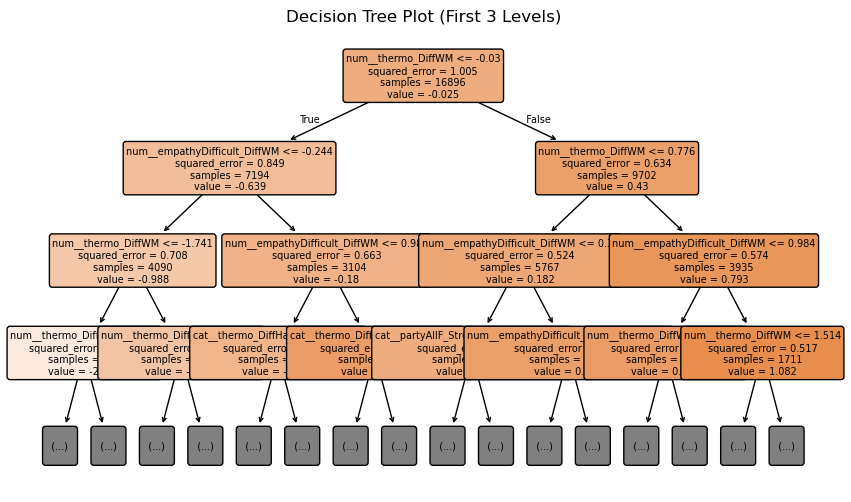

In [19]:
plt.figure(figsize=(10, 6))

tree.plot_tree(best_model.named_steps['tree'], max_depth=3, filled=True, rounded = True, feature_names=best_model.named_steps['preprocessor'].get_feature_names_out(), fontsize=7)

plt.title("Decision Tree Plot (First 3 Levels)")
plt.show()

In [15]:
print("Best CV RMSE:", np.sqrt(-grid_search.best_score_))

Best CV RMSE: 0.6660711843581719
